In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report

In [196]:
yelp = pd.read_csv('yelp.csv')

In [197]:
yelp.drop('business_id', axis=1, inplace=True)
yelp.drop('review_id', axis=1, inplace=True)


In [200]:
yelp.head(2)

,date,stars,text,type,user_id,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [168]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [169]:
yelp['text length'] = yelp['text'].apply(len)

In [170]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [171]:
sns.set_style('white')

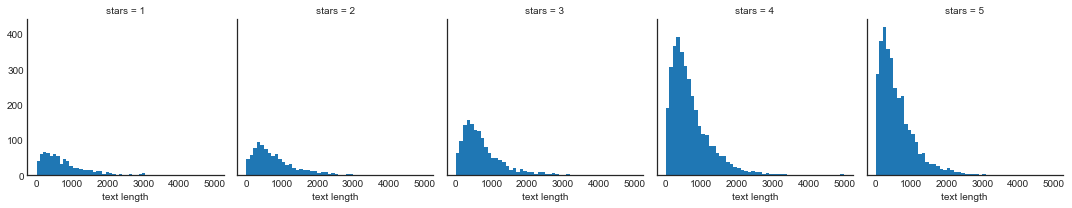

In [172]:
g= sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length', bins=50)

In [173]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [174]:
#NLP Classification 

In [175]:
yelp_class = yelp[(yelp['stars']==1)| (yelp['stars']==5)]
yelp_class.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [176]:
X = yelp_class['text']
y= yelp_class['stars']

In [177]:
cv = CountVectorizer()

In [178]:
X = cv.fit_transform(X)

In [179]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)


In [180]:

nb = MultinomialNB()

In [181]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [182]:
predictions = nb.predict(X_test)


In [183]:
print(confusion_matrix(y_test, predictions))

[[ 164   85]
 [  23 1077]]


In [184]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.88      0.66      0.75       249
          5       0.93      0.98      0.95      1100

avg / total       0.92      0.92      0.92      1349

